In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
dataset=pd.read_csv(r"data_hotel.csv")

In [147]:
dataset.head(5)

,Unnamed: 0,name,city,Check_in_date,Check_out_date,Rating,Review,Distance_to_city_center(km),Distance_to_Airpot(km),pool,...,free_parking,bathtub,restuarant,Airport_transfer,Bar,Kitchen,Connecting_rooms_available,Internet_access,Pet_friendly,PRICE
0,0,The Park Hyderabad,Hyderabad,12-02-2021,14-02-2021,NaN,NaN,4.0,20.0,yes,...,yes,no,yes,yes,no,no,no,no,no,5040
1,1,The Westin Hyderabad Mindspace,Hyderabad,12-02-2021,14-02-2021,NaN,NaN,9.9,22.0,yes,...,yes,no,yes,yes,no,no,no,no,no,7800
2,2,Courtyard by Marriott Hyderabad,Hyderabad,12-02-2021,14-02-2021,NaN,NaN,4.7,21.0,yes,...,yes,no,yes,yes,no,no,no,no,no,6700
3,3,Courtyard by Marriott Hyderabad,Hyderabad,12-02-2021,14-02-2021,NaN,NaN,4.7,21.0,yes,...,yes,no,yes,yes,no,no,no,no,no,6700
4,4,Radisson Blu Plaza Hotel Hyderabad Banjara Hills,Hyderabad,12-02-2021,14-02-2021,7.6,Good,4.5,20.0,yes,...,yes,no,yes,yes,no,no,no,no,no,6375


In [148]:
dataset.drop(["Unnamed: 0","Rating","Review"],axis=1,inplace=True)

In [149]:
dataset.isnull().any()

name                           False
city                           False
Check_in_date                  False
Check_out_date                 False
Distance_to_city_center(km)     True
Distance_to_Airpot(km)          True
pool                           False
gym                            False
spa                            False
free_parking                   False
bathtub                        False
restuarant                     False
Airport_transfer               False
Bar                            False
Kitchen                        False
Connecting_rooms_available     False
Internet_access                False
Pet_friendly                   False
PRICE                          False
dtype: bool

In [150]:
dataset.dtypes

name                            object
city                            object
Check_in_date                   object
Check_out_date                  object
Distance_to_city_center(km)    float64
Distance_to_Airpot(km)         float64
pool                            object
gym                             object
spa                             object
free_parking                    object
bathtub                         object
restuarant                      object
Airport_transfer                object
Bar                             object
Kitchen                         object
Connecting_rooms_available      object
Internet_access                 object
Pet_friendly                    object
PRICE                            int64
dtype: object

In [151]:


dataset["Check_in_date"]=pd.to_datetime(dataset["Check_in_date"])

dataset["check_in_month"]=dataset["Check_in_date"].dt.month

dataset["check_in_year"]=dataset["Check_in_date"].dt.year

dataset["check_in_day"]=dataset["Check_in_date"].dt.day

dataset["Check_out_date"]=pd.to_datetime(dataset["Check_out_date"])

dataset["check_out_year"]=dataset["Check_out_date"].dt.year

dataset["check_out_month"]=dataset["Check_out_date"].dt.month

dataset["check_out_day"]=dataset["Check_out_date"].dt.day



In [152]:
dataset["name"].value_counts()

Courtyard by Marriott Mumbai International Airport    9
Best Western Ashoka                                   8
Courtyard by Marriott Hyderabad                       7
Fairfield by Marriott Kolkata                         7
Highland Choj                                         7
                                                     ..
OYO 28629 Hotel Crosswind                             1
OYO 28416 Ananya Royals                               1
Altair                                                1
Treebo Trend Regency                                  1
Marrina Hotel                                         1
Name: name, Length: 1983, dtype: int64

In [153]:
dataset["PRICE"].value_counts()

10000    67
15000    66
6000     64
12000    47
9000     40
         ..
5967      1
5979      1
36700     1
10077     1
4094      1
Name: PRICE, Length: 2649, dtype: int64

In [154]:
dataset.drop(["Check_in_date","Check_out_date"],axis=1,inplace=True)

In [155]:
dataset["name"].value_counts()

Courtyard by Marriott Mumbai International Airport    9
Best Western Ashoka                                   8
Courtyard by Marriott Hyderabad                       7
Fairfield by Marriott Kolkata                         7
Highland Choj                                         7
                                                     ..
OYO 28629 Hotel Crosswind                             1
OYO 28416 Ananya Royals                               1
Altair                                                1
Treebo Trend Regency                                  1
Marrina Hotel                                         1
Name: name, Length: 1983, dtype: int64

# 1. Handle Missing values

In [156]:
dataset.isnull().sum()

name                            0
city                            0
Distance_to_city_center(km)    23
Distance_to_Airpot(km)         23
pool                            0
gym                             0
spa                             0
free_parking                    0
bathtub                         0
restuarant                      0
Airport_transfer                0
Bar                             0
Kitchen                         0
Connecting_rooms_available      0
Internet_access                 0
Pet_friendly                    0
PRICE                           0
check_in_month                  0
check_in_year                   0
check_in_day                    0
check_out_year                  0
check_out_month                 0
check_out_day                   0
dtype: int64

In [157]:
dataset.fillna(dataset.median(),inplace=True)

In [158]:
dataset.isnull().any()

name                           False
city                           False
Distance_to_city_center(km)    False
Distance_to_Airpot(km)         False
pool                           False
gym                            False
spa                            False
free_parking                   False
bathtub                        False
restuarant                     False
Airport_transfer               False
Bar                            False
Kitchen                        False
Connecting_rooms_available     False
Internet_access                False
Pet_friendly                   False
PRICE                          False
check_in_month                 False
check_in_year                  False
check_in_day                   False
check_out_year                 False
check_out_month                False
check_out_day                  False
dtype: bool

# divide data into numerical and categorical type

In [159]:
num=[]

In [160]:
for col in dataset.columns:
    if(dataset[col].dtypes!="object"):
          num.append(col)

In [161]:
dataset_num=dataset[num]

In [162]:
dataset_num=dataset_num[["Distance_to_city_center(km)","Distance_to_Airpot(km)","check_in_month","check_in_year","check_in_day","check_out_year","check_out_month","check_out_day","PRICE"]]

In [163]:
cat=[]

In [164]:
for col in dataset.columns:
    if(dataset[col].dtypes=="object"):
          cat.append(col)

In [165]:
dataset_cat=dataset[cat]

In [166]:
cat

['name',
 'city',
 'pool',
 'gym',
 'spa',
 'free_parking',
 'bathtub',
 'restuarant',
 'Airport_transfer',
 'Bar',
 'Kitchen',
 'Connecting_rooms_available',
 'Internet_access',
 'Pet_friendly']

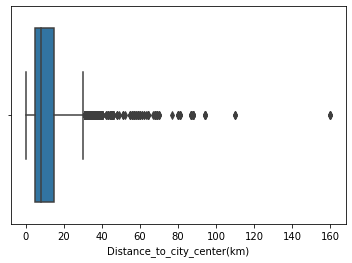

In [167]:
sns.boxplot(dataset_num["Distance_to_city_center(km)"])

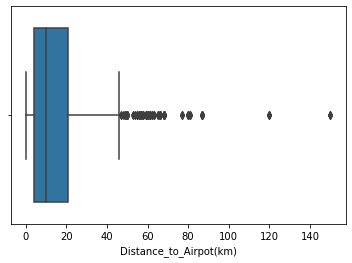

In [168]:
sns.boxplot(dataset_num["Distance_to_Airpot(km)"])

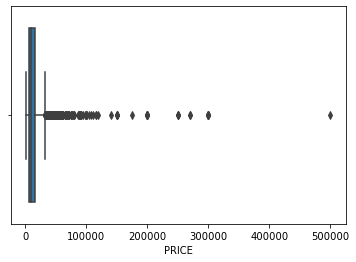

In [169]:
sns.boxplot(dataset_num["PRICE"])

# Handling Outliers

In [170]:
for col in dataset_num.columns:
    q1=dataset_num[col].describe()["25%"]
    q3=dataset_num[col].describe()["75%"]
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    count=dataset_num[(dataset_num[col]<lb)  | (dataset_num[col]>ub)].shape[0]
    p=count/5342*100
if (count>0):
            print("======================"+col+"======================")
            print("count",count)
            print("Percentage",p)

======================PRICE======================
count 381
Percentage 7.1321602396106325


In [171]:
outliers=dataset_num[(dataset_num[col]<lb)  | (dataset_num[col]>ub)]

In [172]:
lb_dict={}.fromkeys(dataset_num[(dataset_num["PRICE"]<lb)]["PRICE"],lb)

In [173]:
ub_dict={}.fromkeys(dataset_num[(dataset_num["PRICE"]>ub)]["PRICE"],ub)

In [174]:
lb_dict.update(ub_dict)

In [175]:
dataset_num["PRICE"]=dataset_num["PRICE"].replace(lb_dict)

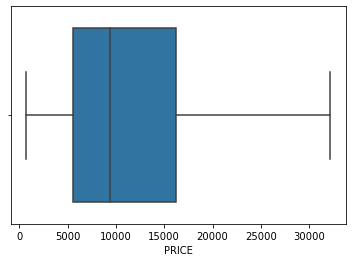

In [176]:
sns.boxplot(dataset_num["PRICE"])

In [177]:
dataset_num.drop(["check_in_month","check_in_year","check_in_day","check_out_year","check_out_month","check_out_day"],axis=1,inplace=True)

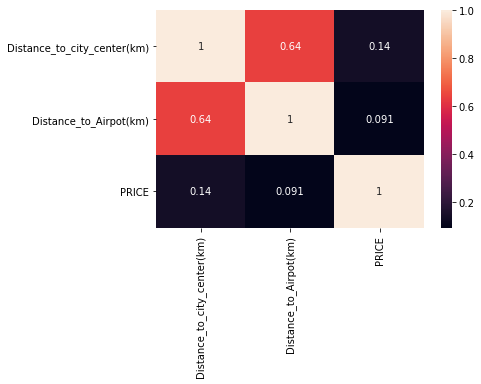

In [178]:
sns.heatmap(dataset_num.corr(),annot=True)

# Encoding the data


In [179]:
name_dict=dataset["name"].value_counts().to_dict()

In [180]:
dataset["name"].unique()

array(['The Park Hyderabad', 'The Westin Hyderabad Mindspace',
       'Courtyard by Marriott Hyderabad', ...,
       'WelcomHeritage Mani Mansion', 'Hotel Cosmopolitan Ahmedabad',
       'Hotel Aagman'], dtype=object)

In [181]:
dataset["name"]=dataset["name"].replace(name_dict)

In [182]:
city_dict=dataset["city"].value_counts().to_dict()

In [183]:
dataset["city"]=dataset["city"].replace(city_dict)

In [184]:
dataset=pd.get_dummies(dataset, drop_first=True)

In [185]:
dataset

,name,city,Distance_to_city_center(km),Distance_to_Airpot(km),PRICE,check_in_month,check_in_year,check_in_day,check_out_year,check_out_month,...,spa_yes,free_parking_yes,bathtub_yes,restuarant_yes,Airport_transfer_yes,Bar_yes,Kitchen_yes,Connecting_rooms_available_yes,Internet_access_yes,Pet_friendly_yes
0,3,279,4.0,20.0,5040,12,2021,2,2021,2,...,1,1,0,1,1,0,0,0,0,0
1,5,279,9.9,22.0,7800,12,2021,2,2021,2,...,1,1,0,1,1,0,0,0,0,0
2,7,279,4.7,21.0,6700,12,2021,2,2021,2,...,1,1,0,1,1,0,0,0,0,0
3,7,279,4.7,21.0,6700,12,2021,2,2021,2,...,1,1,0,1,1,0,0,0,0,0
4,4,279,4.5,20.0,6375,12,2021,2,2021,2,...,1,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5337,2,264,4.9,9.7,46349,12,2021,2,2021,2,...,0,1,1,0,0,0,0,0,0,0
5338,2,264,1.6,8.0,8793,12,2021,2,2021,2,...,0,0,1,0,0,0,0,0,0,0
5339,1,264,77.0,77.0,5396,12,2021,2,2021,2,...,0,1,0,0,0,0,0,0,0,0
5340,4,264,11.0,16.0,6950,12,2021,2,2021,2,...,0,0,1,0,0,0,0,0,0,0


# Splitting into train and test data

In [186]:
x=dataset.iloc[:,0:22].values

In [187]:
y=dataset.iloc[:,22]

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Feature Scaling

In [190]:
from sklearn.preprocessing import StandardScaler

In [191]:
sc=StandardScaler()

In [192]:
x_train=sc.fit_transform(x_train)

In [193]:
x_test=sc.transform(x_test)

# Building a model

In [194]:
from sklearn.linear_model import Ridge
ri_model=Ridge(alpha=1)
ri_model.fit(x_train,y_train)
y_predri=ri_model.predict(x_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

r2_scoreri=r2_score(y_test,y_predri)
print("r2_score:",r2_scoreri)

r2_score: 0.048512662798425144


In [195]:
from sklearn.linear_model import Lasso
la_model=Lasso(alpha=1)
la_model.fit(x_train,y_train)
y_predla=la_model.predict(x_test)

r2_scorela=r2_score(y_test,y_predla)
print("r2_score",r2_scorela)

r2_score -0.0009303604480987993


In [196]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor(max_features='auto')
dt.fit(x_train,y_train)
y_preddt=dt.predict(x_test)

r2_scoredt=r2_score(y_test,y_preddt)
print("r2_score",r2_scoredt)


r2_score 0.4032144326261974


In [197]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
adb=AdaBoostRegressor(n_estimators=10)
adb.fit(x_train,y_train)
y_predadb=adb.predict(x_test)

r2_scoreadb=r2_score(y_test,y_predadb)
print("r2_score",r2_scoreadb)

r2_score -0.0006331134911941039


In [198]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

gbm=GradientBoostingRegressor(n_estimators=10)
gbm.fit(x_train,y_train)
y_predgbm=gbm.predict(x_test)

r2_scoregbm=r2_score(y_test,y_predgbm)
print("r2_score",r2_scoregbm)

r2_score 0.10191500749465776


In [199]:
from sklearn.svm import SVR
sv=SVR(kernel="linear")
sv.fit(x_train,y_train)
y_predsvr=sv.predict(x_test)

r2_scoresvr=r2_score(y_test,y_predsvr)
print("r2_score",r2_scoresvr)

r2_score -0.02212332606512435


In [200]:
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

xgb=XGBRegressor(n_estimators=10)
xgb.fit(x_train,y_train)
y_predxg=xgb.predict(x_test)

r2_scorexg=r2_score(y_test,y_predxg)
print("r2_score",r2_scorexg)

r2_score 0.4194728077150157


In [202]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_predrf=rf.predict(x_test)

r2_scorerf=r2_score(y_test,y_predrf)
print("r2_score",r2_scorerf)

r2_score 0.6667046835517425


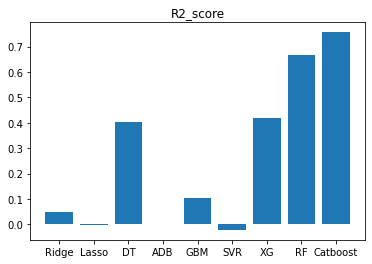

In [232]:
x=["Ridge","Lasso","DT","ADB","GBM","SVR","XG","RF","Catboost"]
y=[r2_scoreri,r2_scorela,r2_scoredt,r2_scoreadb,r2_scoregbm,r2_scoresvr,r2_scorexg,r2_scorerf,r2_scorecat]
plt.bar(x,y)
plt.title("R2_score")
plt.show()

# Hyperparameter tuning in DT

In [205]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [206]:
dt=DecisionTreeRegressor()

In [207]:
max_depth=np.linspace(3,100,num=2,dtype="int")
max_features=['auto','sqrt','log2']
min_samples_leaf=[1,2,5,10,15]
min_samples_split=[2,5,10,15,30,50]
criterion=['mse']

In [208]:
param_dict={"max_depth":max_depth,
            "max_features":max_features,
            "min_samples_leaf": min_samples_leaf,
            "min_samples_split":min_samples_split,
            "criterion":criterion
           }

In [209]:
param_dict

{'max_depth': array([  3, 100]),
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 5, 10, 15],
 'min_samples_split': [2, 5, 10, 15, 30, 50],
 'criterion': ['mse']}

In [210]:
gsv= GridSearchCV(dt,param_grid=param_dict,scoring="r2", n_jobs=-1,cv=5,verbose=5,return_train_score=True)

In [211]:
gsv.fit(x_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 772 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    6.3s finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_depth': array([  3, 100]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10, 15],
                         'min_samples_split': [2, 5, 10, 15, 30, 50]},
             return_train_score=True, scoring='r2', verbose=5)

In [212]:
y_predgsv=gsv.predict(x_test)

In [213]:
gsv.best_score_

0.2795920339104992

In [214]:
gsv.best_estimator_

DecisionTreeRegressor(max_depth=100, max_features='auto', min_samples_leaf=2,
                      min_samples_split=5)

In [215]:
gsv.best_params_

{'criterion': 'mse',
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5}

# RandomizedSearchCV

In [216]:
rmsv=RandomizedSearchCV(dt,param_distributions=param_dict,scoring="r2", n_jobs=-1,cv=3,verbose=5,return_train_score=True)

In [217]:
rmsv.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse'],
                                        'max_depth': array([  3, 100]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10, 15],
                                        'min_samples_split': [2, 5, 10, 15, 30,
                                                              50]},
                   return_train_score=True, scoring='r2', verbose=5)

In [218]:
y_predrmsv=rmsv.predict(x_test)

In [219]:
rmsv.best_estimator_

DecisionTreeRegressor(max_depth=100, max_features='auto', min_samples_split=50)

In [220]:
rmsv.best_params_

{'min_samples_split': 50,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'criterion': 'mse'}

In [221]:
rmsv.best_score_

0.18882801816662598

# cat_boost

In [222]:
from catboost import CatBoostRegressor


In [223]:
categorical_features_indices = np.where(dataset.dtypes != np.float)[0]

In [224]:
from catboost import CatBoostRegressor
model=CatBoostRegressor(learning_rate=0.5)
cb=model.fit(x_train, y_train)

0:	learn: 0.2137642	total: 94.1ms	remaining: 1m 33s
1:	learn: 0.2107197	total: 98.7ms	remaining: 49.2s
2:	learn: 0.2067023	total: 103ms	remaining: 34.2s
3:	learn: 0.2003839	total: 107ms	remaining: 26.5s
4:	learn: 0.1986814	total: 110ms	remaining: 21.9s
5:	learn: 0.1955870	total: 114ms	remaining: 18.8s
6:	learn: 0.1934659	total: 117ms	remaining: 16.6s
7:	learn: 0.1916419	total: 121ms	remaining: 15s
8:	learn: 0.1892353	total: 125ms	remaining: 13.7s
9:	learn: 0.1872279	total: 128ms	remaining: 12.7s
10:	learn: 0.1850606	total: 133ms	remaining: 11.9s
11:	learn: 0.1833553	total: 137ms	remaining: 11.3s
12:	learn: 0.1787062	total: 141ms	remaining: 10.7s
13:	learn: 0.1767125	total: 145ms	remaining: 10.2s
14:	learn: 0.1743497	total: 149ms	remaining: 9.78s
15:	learn: 0.1731460	total: 153ms	remaining: 9.38s
16:	learn: 0.1713679	total: 156ms	remaining: 9s
17:	learn: 0.1702248	total: 159ms	remaining: 8.69s
18:	learn: 0.1690339	total: 163ms	remaining: 8.41s
19:	learn: 0.1677767	total: 167ms	remaining

181:	learn: 0.0631150	total: 758ms	remaining: 3.4s
182:	learn: 0.0628763	total: 761ms	remaining: 3.4s
183:	learn: 0.0627859	total: 765ms	remaining: 3.39s
184:	learn: 0.0624654	total: 770ms	remaining: 3.39s
185:	learn: 0.0620354	total: 773ms	remaining: 3.38s
186:	learn: 0.0616519	total: 776ms	remaining: 3.38s
187:	learn: 0.0613111	total: 779ms	remaining: 3.37s
188:	learn: 0.0610324	total: 783ms	remaining: 3.36s
189:	learn: 0.0608099	total: 787ms	remaining: 3.35s
190:	learn: 0.0599959	total: 790ms	remaining: 3.35s
191:	learn: 0.0598153	total: 794ms	remaining: 3.34s
192:	learn: 0.0596601	total: 798ms	remaining: 3.34s
193:	learn: 0.0593853	total: 803ms	remaining: 3.33s
194:	learn: 0.0591871	total: 806ms	remaining: 3.33s
195:	learn: 0.0587119	total: 811ms	remaining: 3.32s
196:	learn: 0.0584414	total: 814ms	remaining: 3.32s
197:	learn: 0.0582482	total: 818ms	remaining: 3.31s
198:	learn: 0.0580425	total: 822ms	remaining: 3.31s
199:	learn: 0.0578874	total: 826ms	remaining: 3.3s
200:	learn: 0.0

357:	learn: 0.0331101	total: 1.42s	remaining: 2.55s
358:	learn: 0.0330446	total: 1.43s	remaining: 2.55s
359:	learn: 0.0328949	total: 1.43s	remaining: 2.54s
360:	learn: 0.0327450	total: 1.43s	remaining: 2.54s
361:	learn: 0.0326663	total: 1.44s	remaining: 2.53s
362:	learn: 0.0326311	total: 1.44s	remaining: 2.53s
363:	learn: 0.0325445	total: 1.44s	remaining: 2.52s
364:	learn: 0.0325164	total: 1.45s	remaining: 2.52s
365:	learn: 0.0324372	total: 1.45s	remaining: 2.51s
366:	learn: 0.0323267	total: 1.45s	remaining: 2.51s
367:	learn: 0.0321828	total: 1.46s	remaining: 2.5s
368:	learn: 0.0321183	total: 1.46s	remaining: 2.5s
369:	learn: 0.0320306	total: 1.47s	remaining: 2.5s
370:	learn: 0.0319042	total: 1.47s	remaining: 2.49s
371:	learn: 0.0318110	total: 1.47s	remaining: 2.49s
372:	learn: 0.0317321	total: 1.48s	remaining: 2.48s
373:	learn: 0.0316374	total: 1.48s	remaining: 2.48s
374:	learn: 0.0315519	total: 1.49s	remaining: 2.48s
375:	learn: 0.0314811	total: 1.49s	remaining: 2.47s
376:	learn: 0.0

532:	learn: 0.0206966	total: 2.08s	remaining: 1.82s
533:	learn: 0.0206651	total: 2.08s	remaining: 1.82s
534:	learn: 0.0206174	total: 2.09s	remaining: 1.81s
535:	learn: 0.0205496	total: 2.09s	remaining: 1.81s
536:	learn: 0.0205111	total: 2.09s	remaining: 1.8s
537:	learn: 0.0204823	total: 2.1s	remaining: 1.8s
538:	learn: 0.0203895	total: 2.1s	remaining: 1.8s
539:	learn: 0.0203682	total: 2.1s	remaining: 1.79s
540:	learn: 0.0203349	total: 2.11s	remaining: 1.79s
541:	learn: 0.0202915	total: 2.11s	remaining: 1.78s
542:	learn: 0.0202477	total: 2.12s	remaining: 1.78s
543:	learn: 0.0202177	total: 2.12s	remaining: 1.78s
544:	learn: 0.0201590	total: 2.12s	remaining: 1.77s
545:	learn: 0.0200994	total: 2.13s	remaining: 1.77s
546:	learn: 0.0200861	total: 2.13s	remaining: 1.76s
547:	learn: 0.0200205	total: 2.13s	remaining: 1.76s
548:	learn: 0.0199384	total: 2.14s	remaining: 1.76s
549:	learn: 0.0199076	total: 2.14s	remaining: 1.75s
550:	learn: 0.0198545	total: 2.15s	remaining: 1.75s
551:	learn: 0.0198

704:	learn: 0.0146322	total: 2.74s	remaining: 1.15s
705:	learn: 0.0146179	total: 2.74s	remaining: 1.14s
706:	learn: 0.0145912	total: 2.75s	remaining: 1.14s
707:	learn: 0.0145239	total: 2.75s	remaining: 1.13s
708:	learn: 0.0145057	total: 2.75s	remaining: 1.13s
709:	learn: 0.0144804	total: 2.75s	remaining: 1.13s
710:	learn: 0.0144562	total: 2.76s	remaining: 1.12s
711:	learn: 0.0144059	total: 2.76s	remaining: 1.12s
712:	learn: 0.0143752	total: 2.77s	remaining: 1.11s
713:	learn: 0.0143691	total: 2.77s	remaining: 1.11s
714:	learn: 0.0143518	total: 2.77s	remaining: 1.1s
715:	learn: 0.0143370	total: 2.78s	remaining: 1.1s
716:	learn: 0.0143145	total: 2.78s	remaining: 1.1s
717:	learn: 0.0142927	total: 2.78s	remaining: 1.09s
718:	learn: 0.0142241	total: 2.79s	remaining: 1.09s
719:	learn: 0.0142022	total: 2.79s	remaining: 1.08s
720:	learn: 0.0141838	total: 2.79s	remaining: 1.08s
721:	learn: 0.0141784	total: 2.8s	remaining: 1.08s
722:	learn: 0.0141518	total: 2.8s	remaining: 1.07s
723:	learn: 0.014

874:	learn: 0.0107635	total: 3.39s	remaining: 485ms
875:	learn: 0.0107376	total: 3.4s	remaining: 481ms
876:	learn: 0.0107138	total: 3.4s	remaining: 477ms
877:	learn: 0.0106909	total: 3.4s	remaining: 473ms
878:	learn: 0.0106720	total: 3.41s	remaining: 469ms
879:	learn: 0.0106700	total: 3.41s	remaining: 465ms
880:	learn: 0.0106579	total: 3.41s	remaining: 461ms
881:	learn: 0.0106529	total: 3.42s	remaining: 457ms
882:	learn: 0.0106314	total: 3.42s	remaining: 453ms
883:	learn: 0.0105988	total: 3.42s	remaining: 450ms
884:	learn: 0.0105825	total: 3.43s	remaining: 446ms
885:	learn: 0.0105570	total: 3.43s	remaining: 442ms
886:	learn: 0.0105126	total: 3.44s	remaining: 438ms
887:	learn: 0.0104991	total: 3.44s	remaining: 434ms
888:	learn: 0.0104834	total: 3.44s	remaining: 430ms
889:	learn: 0.0104392	total: 3.45s	remaining: 426ms
890:	learn: 0.0104253	total: 3.45s	remaining: 422ms
891:	learn: 0.0103953	total: 3.46s	remaining: 418ms
892:	learn: 0.0103700	total: 3.46s	remaining: 415ms
893:	learn: 0.0

In [225]:
y_pred=cb.predict(x_test)

In [226]:
r2_scorecat=r2_score(y_test,y_pred)

In [227]:
print(r2_scorecat)

0.756254090689708


In [228]:
cb.best_score_

{'learn': {'RMSE': 0.008757671538444256}}

In [229]:
cb.feature_importances_

array([ 7.73470971, 14.16783709, 16.73271958, 12.67407897,  7.32546596,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.54338382,  4.50994991,  2.61669153,  6.76460883,  1.19412472,
        0.96364386, 11.36941407,  5.89714764,  2.86856547,  0.66238777,
        1.08321036,  1.89206071])

# save the model

In [230]:
import joblib


In [231]:
joblib.dump(cb,"hotel.pkl")

['hotel.pkl']